# Test our Ecohydrology module

This notebook is to test that importing and using our implementation of the Ecohydrology model works. 

In [1]:
from ecohydr_mod import EcoHyd
import numpy as np

In [2]:
WSA_array = np.zeros((51,51))
# Set 20 random values to 1
indices_to_set = np.random.choice(range(51 * 51), size=20, replace=False)
row_indices, col_indices = np.unravel_index(indices_to_set, (51, 51))
WSA_array[row_indices, col_indices] = int(1)

Ecohyd_model = EcoHyd()

In [3]:
import matplotlib.pyplot as plt

In [24]:
biomass_harvest, SM_canic_end = Ecohyd_model.stepper(WSA_array)

363
2.9952087611224902
soil moisture sat.: [ 0.1534004   0.15440158  0.15438349 ...,  0.14807742  0.14808891
  0.14810086]
live biomass:  [ 49.34786346  43.51852095  43.52179178 ...,   1.           1.
   1.        ]
ET:  [ 11.87824236  11.89491558  11.91094527 ...,   6.21423808   6.20523659
   6.19590912]
ET30:  [ 11.87824236  11.89491558  11.91094527 ...,   6.21423808   6.20523659
   6.19590912]
PFT:  [0 0 0 ..., 0 0 0]
364
2.9979466119096223
soil moisture sat.: [ 0.17695036  0.17805263  0.17802662 ...,  0.17382618  0.173842
  0.17385844]
live biomass:  [ 54.49768854  47.73517717  47.74296276 ...,   1.           1.
   1.        ]
ET:  [ 11.87824236  11.89491558  11.91094527 ...,   6.21423808   6.20523659
   6.19590912]
ET30:  [ 11.87824236  11.89491558  11.91094527 ...,   6.21423808   6.20523659
   6.19590912]
PFT:  [0 0 0 ..., 0 0 0]
0
3.0006844626967544
soil moisture sat.: [ 0.17927131  0.18047558  0.18044213 ...,  0.17852105  0.17854148
  0.17856269]
live biomass:  [ 59.73137814  5

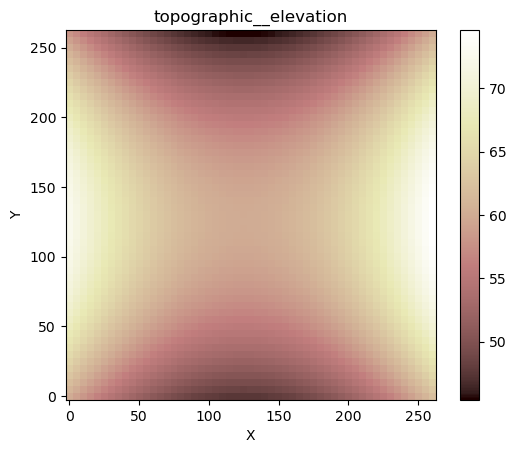

In [15]:
from landlab.plot.imshow import imshow_grid_at_node
#N.B. the Landlab user guide tells you to import the wrong component here

plt.figure('Elevations from the field')  # new fig, with a name
imshow_grid_at_node(Ecohyd_model.mg, 'topographic__elevation') 
plt.show()

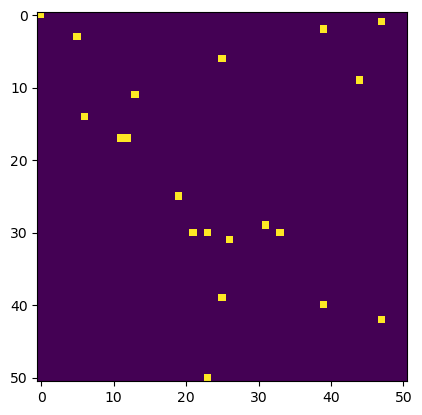

In [16]:
plt.imshow(WSA_array)

N.B the following images are all flipped upside-down because np.reshape assumes by default that the origin is in the top left, not the bottom left.

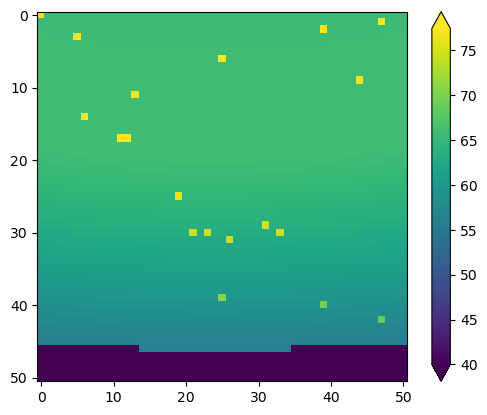

In [25]:
plt.imshow(np.reshape(biomass_harvest, (51,51)), vmin=40)
plt.colorbar(extend = 'both')

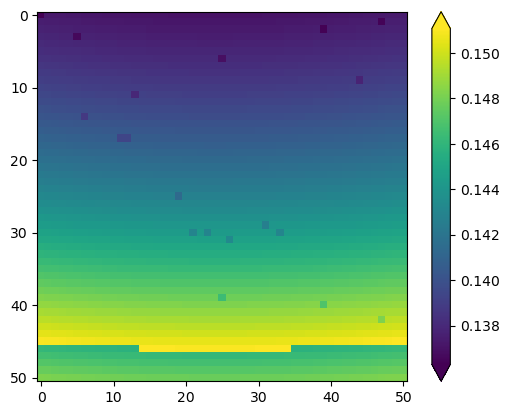

In [26]:
plt.imshow(np.reshape(SM_canic_end, (51,51)))
plt.colorbar(extend = 'both')

Why does WSA decrease soil moisture? A bit sus... Maybe there is still enough rainfall that the cover crop interception leads to less SM.

Almost more importantly though, we need to figure out what causes the weird artifact at the bottom of the plot (i.e., the North of the domain). Why is soil moisture there so much lower? As-is, this will dominate any potential effects from WSA.

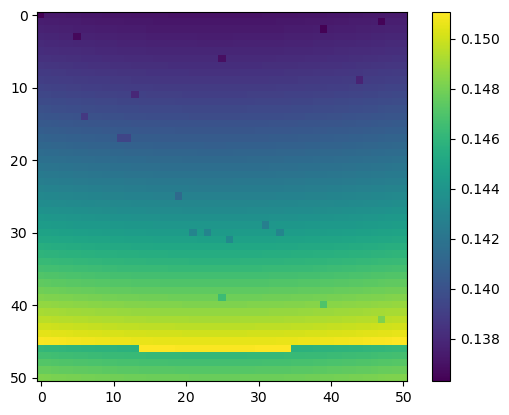

In [27]:
SM = np.reshape(Ecohyd_model.mg.at_cell['soil_moisture__saturation_fraction'], (51,51))
plt.imshow(SM)
plt.colorbar()

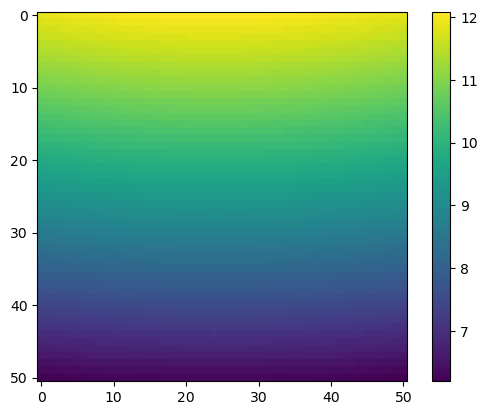

In [28]:
ET = np.reshape(Ecohyd_model.mg.at_cell['surface__potential_evapotranspiration_rate'], (51,51))
plt.imshow(ET)
plt.colorbar()

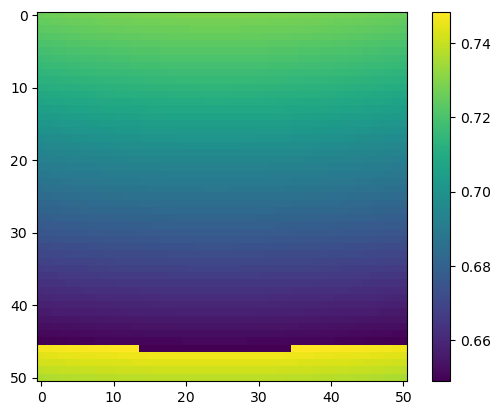

In [11]:
WS = np.reshape(Ecohyd_model.mg.at_cell['vegetation__water_stress'], (51,51))
plt.imshow(WS)
plt.colorbar()

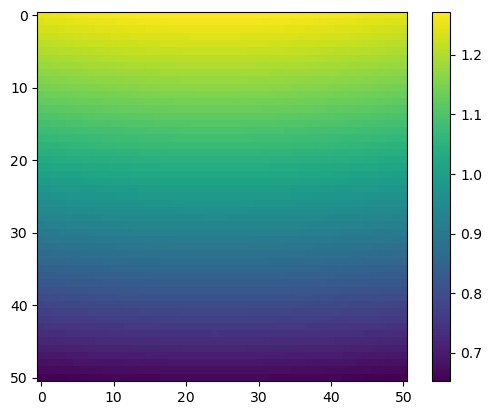

In [12]:
Rad_slope = np.reshape(Ecohyd_model.mg.at_cell['radiation__ratio_to_flat_surface'], (51,51))
plt.imshow(Rad_slope)
plt.colorbar()

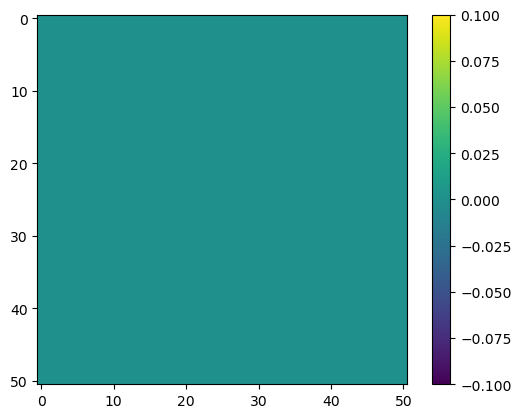

In [13]:
rad = np.reshape(Ecohyd_model.mg.at_cell['radiation__net_flux'], (51,51))
plt.imshow(rad)
plt.colorbar()